In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt

df = pd.read_csv('/content/Age Prediction.csv')

In [2]:
df.head()

,PAQ605,BMXBMI,LBXGLU,LBXGLT,LBXIN,age_group
0,2.0,1.393867,110.0,150.0,14.91,0
1,2.0,1.099498,89.0,80.0,3.85,0
2,2.0,0.629968,89.0,68.0,6.14,0
3,2.0,0.292901,104.0,84.0,16.15,0
4,1.0,1.426249,103.0,81.0,10.92,0


In [3]:
df.tail()

,PAQ605,BMXBMI,LBXGLU,LBXGLT,LBXIN,age_group
3519,1.02742,0.616286,102.219362,164.917739,20.862093,1
3520,2.00000,0.233323,95.785948,80.607026,4.404918,1
3521,2.00000,0.855922,94.000000,137.370937,13.323040,1
3522,2.00000,1.182898,117.464956,150.116814,26.663496,1
3523,2.00000,0.130003,88.165628,107.000000,3.637186,1


In [ ]:
X = df.drop('target_column', axis=1)  # Replace 'target_column' with your target column name
y = df['target_column']

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, mean_squared_error
import numpy as np

# Target variable
y = df['age_group']

# Features to evaluate
features = ['PAQ605', 'BMXBMI', 'LBXGLU', 'LBXGLT', 'LBXIN']

# Dictionary to store results
results = {}

# Iterate through each feature
for feature in features:
    X = df[[feature]]  # Take each feature individually as X

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Fit the Logistic Regression model
    model = LogisticRegression()
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probability estimates for ROC-AUC

    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    # Store results
    results[feature] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': roc_auc,
        'RMSE': rmse
    }

# Print the results for each feature
for feature, metrics in results.items():
    print(f"Feature: {feature}")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")
    print("\n")


Feature: PAQ605
Accuracy: 0.5376
Precision: 0.5138
Recall: 0.8713
F1-Score: 0.6464
ROC-AUC: 0.5510
RMSE: 0.6800


Feature: BMXBMI
Accuracy: 0.5674
Precision: 0.5416
Recall: 0.7047
F1-Score: 0.6125
ROC-AUC: 0.5754
RMSE: 0.6577


Feature: LBXGLU
Accuracy: 0.5986
Precision: 0.5845
Recall: 0.5965
F1-Score: 0.5904
ROC-AUC: 0.6269
RMSE: 0.6336


Feature: LBXGLT
Accuracy: 0.6482
Precision: 0.6516
Recall: 0.5906
F1-Score: 0.6196
ROC-AUC: 0.7001
RMSE: 0.5931


Feature: LBXIN
Accuracy: 0.5177
Precision: 0.5022
Recall: 0.6579
F1-Score: 0.5696
ROC-AUC: 0.5386
RMSE: 0.6945




In [5]:
# Create a dictionary with the given metrics
metrics = {
    'PAQ605': {'Accuracy': 0.5376, 'Precision': 0.5138, 'Recall': 0.8713, 'F1-Score': 0.6464, 'ROC-AUC': 0.5510, 'RMSE': 0.6800},
    'BMXBMI': {'Accuracy': 0.5674, 'Precision': 0.5416, 'Recall': 0.7047, 'F1-Score': 0.6125, 'ROC-AUC': 0.5754, 'RMSE': 0.6577},
    'LBXGLU': {'Accuracy': 0.5986, 'Precision': 0.5845, 'Recall': 0.5965, 'F1-Score': 0.5904, 'ROC-AUC': 0.6269, 'RMSE': 0.6336},
    'LBXGLT': {'Accuracy': 0.6482, 'Precision': 0.6516, 'Recall': 0.5906, 'F1-Score': 0.6196, 'ROC-AUC': 0.7001, 'RMSE': 0.5931},
    'LBXIN': {'Accuracy': 0.5177, 'Precision': 0.5022, 'Recall': 0.6579, 'F1-Score': 0.5696, 'ROC-AUC': 0.5386, 'RMSE': 0.6945}
}

# Define a function to determine the best metric
def find_best_metric(metrics):
    # Criteria: Prefer highest Accuracy, Precision, Recall, F1-Score, ROC-AUC and lowest RMSE
    best_feature = None
    best_score = {
        'Accuracy': 0,
        'Precision': 0,
        'Recall': 0,
        'F1-Score': 0,
        'ROC-AUC': 0,
        'RMSE': float('inf')  # Lower RMSE is better
    }

    for feature, scores in metrics.items():
        is_better = False
        # Compare by Accuracy
        if scores['Accuracy'] > best_score['Accuracy']:
            is_better = True
        elif scores['Accuracy'] == best_score['Accuracy']:
            # Tie on Accuracy, compare Precision
            if scores['Precision'] > best_score['Precision']:
                is_better = True
            elif scores['Precision'] == best_score['Precision']:
                # Tie on Precision, compare Recall
                if scores['Recall'] > best_score['Recall']:
                    is_better = True
                elif scores['Recall'] == best_score['Recall']:
                    # Tie on Recall, compare F1-Score
                    if scores['F1-Score'] > best_score['F1-Score']:
                        is_better = True
                    elif scores['F1-Score'] == best_score['F1-Score']:
                        # Tie on F1-Score, compare ROC-AUC
                        if scores['ROC-AUC'] > best_score['ROC-AUC']:
                            is_better = True
                        elif scores['ROC-AUC'] == best_score['ROC-AUC']:
                            # Tie on ROC-AUC, compare RMSE (lower is better)
                            if scores['RMSE'] < best_score['RMSE']:
                                is_better = True

        if is_better:
            best_feature = feature
            best_score = scores

    return best_feature, best_score

# Find the best metric
best_feature, best_scores = find_best_metric(metrics)

# Print the best feature and its scores
print(f"The best feature is: {best_feature}")
print("With the following metrics:")
for metric, value in best_scores.items():
    print(f"{metric}: {value:.4f}")


The best feature is: LBXGLT
With the following metrics:
Accuracy: 0.6482
Precision: 0.6516
Recall: 0.5906
F1-Score: 0.6196
ROC-AUC: 0.7001
RMSE: 0.5931


In [16]:
import pandas as pd

df = pd.read_csv('/content/Age Prediction.csv')

# Calculate the average (mean) of the LBXGLT column
average_lbxglt = df['LBXGLT'].mean()

print(f"The average of the LBXGLT column is: {average_lbxglt:.4f}")

The average of the LBXGLT column is: 116.3790


In [36]:
X = df.drop('age_group', axis=1)
y = df['age_group']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

In [38]:
# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Store results
results[feature] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': roc_auc,
        'RMSE': rmse
    }


In [39]:
# Print the results for each feature
for feature, metrics in results.items():
    print(f"Feature: {feature}")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")
    print("\n")

Feature: PAQ605
Accuracy: 0.5376
Precision: 0.5138
Recall: 0.8713
F1-Score: 0.6464
ROC-AUC: 0.5510
RMSE: 0.6800


Feature: BMXBMI
Accuracy: 0.5674
Precision: 0.5416
Recall: 0.7047
F1-Score: 0.6125
ROC-AUC: 0.5754
RMSE: 0.6577


Feature: LBXGLU
Accuracy: 0.5986
Precision: 0.5845
Recall: 0.5965
F1-Score: 0.5904
ROC-AUC: 0.6269
RMSE: 0.6336


Feature: LBXGLT
Accuracy: 0.6482
Precision: 0.6516
Recall: 0.5906
F1-Score: 0.6196
ROC-AUC: 0.7001
RMSE: 0.5931


Feature: LBXIN
Accuracy: 0.7021
Precision: 0.6941
Recall: 0.6901
F1-Score: 0.6921
ROC-AUC: 0.7696
RMSE: 0.5458




In [41]:
# Print the results for each feature
best_accuracy = 0
best_feature = None

for feature, metrics in results.items():
    print(f"Feature: {feature}")
    for metric, value in metrics.items():
        if metric == 'Accuracy':
            print(f"{metric}: {value:.4f}")
            print(f"{metric} (%): {value * 100:.2f}%")
        else:
            print(f"{metric}: {value:.4f}")

    # Track the best accuracy
    if metrics['Accuracy'] > best_accuracy:
        best_accuracy = metrics['Accuracy']
        best_feature = feature

    print("\n")

print(f"Best Accuracy: {best_accuracy * 100:.2f}% (Feature: {best_feature})")

Feature: PAQ605
Accuracy: 0.5376
Accuracy (%): 53.76%
Precision: 0.5138
Recall: 0.8713
F1-Score: 0.6464
ROC-AUC: 0.5510
RMSE: 0.6800


Feature: BMXBMI
Accuracy: 0.5674
Accuracy (%): 56.74%
Precision: 0.5416
Recall: 0.7047
F1-Score: 0.6125
ROC-AUC: 0.5754
RMSE: 0.6577


Feature: LBXGLU
Accuracy: 0.5986
Accuracy (%): 59.86%
Precision: 0.5845
Recall: 0.5965
F1-Score: 0.5904
ROC-AUC: 0.6269
RMSE: 0.6336


Feature: LBXGLT
Accuracy: 0.6482
Accuracy (%): 64.82%
Precision: 0.6516
Recall: 0.5906
F1-Score: 0.6196
ROC-AUC: 0.7001
RMSE: 0.5931


Feature: LBXIN
Accuracy: 0.7021
Accuracy (%): 70.21%
Precision: 0.6941
Recall: 0.6901
F1-Score: 0.6921
ROC-AUC: 0.7696
RMSE: 0.5458


Best Accuracy: 70.21% (Feature: LBXIN)


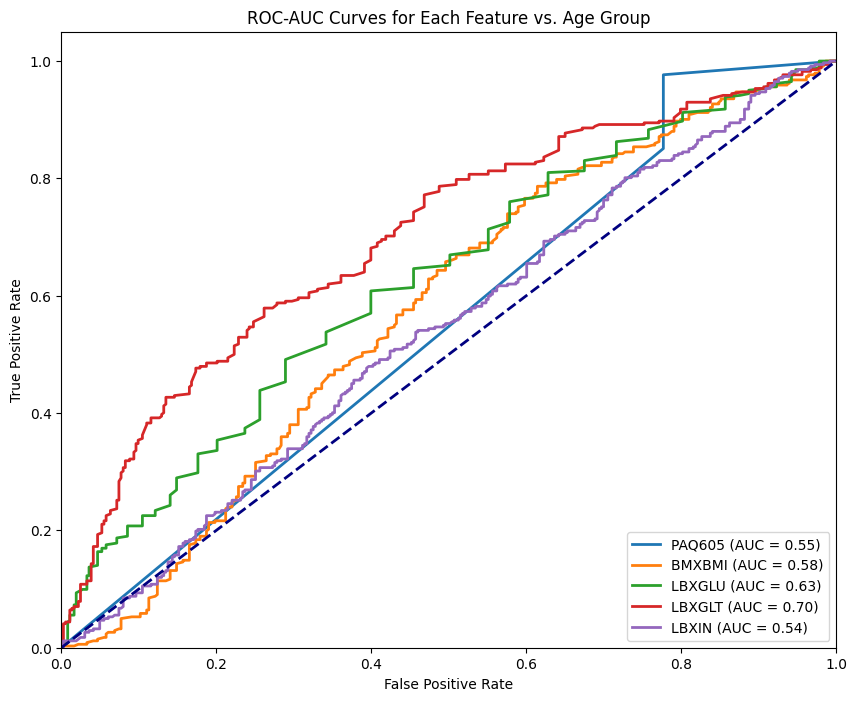

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc

df = pd.read_csv('/content/Age Prediction.csv')

# Target variable
y = df['age_group']  # Ensure 'age_group' is binary (0/1)

# Features to evaluate
features = ['PAQ605', 'BMXBMI', 'LBXGLU', 'LBXGLT', 'LBXIN']

# Plotting ROC-AUC for each feature
plt.figure(figsize=(10, 8))

for feature in features:
    X = df[[feature]]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Fit the Logistic Regression model
    model = LogisticRegression()
    model.fit(X_train, y_train)

    # Predict probabilities
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Calculate ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    # Plot the ROC curve for the current feature
    plt.plot(fpr, tpr, lw=2, label=f'{feature} (AUC = {roc_auc:.2f})')

# Plot the diagonal line for random guessing
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Plot configuration
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curves for Each Feature vs. Age Group')
plt.legend(loc="lower right")
plt.show()
